In [46]:
import pandas as pd
import numpy as np

In [49]:
df=pd.read_csv('/home/sascha/kubernetes-intrusion-detection-main/KubeFocus/datasets/all_datasets_rf_ts.csv')

/tmp/ipykernel_3727277/2423110366.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/home/sascha/kubernetes-intrusion-detection-main/KubeFocus/datasets/all_datasets_rf_ts.csv')


In [54]:
df.iloc[:,1:14].columns #system_calls

Index(['open', 'write', 'close', 'connect', 'unlink', 'accept', 'chdir',
       'execve', 'read', 'kill', 'clone', 'select', 'brk'],
      dtype='object')

In [58]:
df.iloc[:,14:15].columns #logs

Index(['Pod_Logs'], dtype='object')

In [60]:
df.iloc[:,15:19].columns #net

Index(['NetInCount', 'NetOutCount', 'NetInSize', 'NetOutSize'], dtype='object')

In [76]:
df.iloc[:,19:384].columns #metrics

Index(['cluster:node_cpu:sum_rate5m{}',
       'apiserver_flowcontrol_request_execution_seconds_count{endpoint=""https"",flow_schema=""catch-all"",instance=""192.168.122.216:6443"",job=""apiserver"",namespace=""default"",priority_level=""catch-all"",service=""kubernetes"",type=""regular""}',
       'apiserver_flowcontrol_request_execution_seconds_count{endpoint=""https"",flow_schema=""catch-all"",instance=""192.168.122.216:6443"",job=""apiserver"",namespace=""default"",priority_level=""catch-all"",service=""kubernetes"",type=""watch""}',
       'apiserver_flowcontrol_request_execution_seconds_count{endpoint=""https"",flow_schema=""workload-leader-election"",instance=""192.168.122.216:6443"",job=""apiserver"",namespace=""default"",priority_level=""leader-election"",service=""kubernetes"",type=""regular""}',
       'apiserver_flowcontrol_watch_count_samples_sum{endpoint=""https"",flow_schema=""endpoint-controller"",instance=""192.168.122.216:6443"",job=""apiserver"",namespace=""default""

In [41]:
df.iloc[:,190:193].columns #nodes

Index(['node_k8s-master-1', 'node_k8s-worker-1', 'node_k8s-worker-2'], dtype='object')

In [82]:
df.iloc[:,-1:].columns #labels

Index(['attack'], dtype='object')

In [77]:
df.iloc[:, np.r_[:25, 30:190,:-1]].columns

Index(['timestamp', 'open', 'write', 'close', 'connect', 'unlink', 'accept',
       'chdir', 'execve', 'read',
       ...
       'node_network_carrier_up_changes_total{container=""node-exporter"",device=""cali83cb5bd6876"",endpoint=""http-metrics"",instance=""192.168.122.233:9100"",job=""node-exporter"",namespace=""prom"",pod=""kube-prometheus-stack-prometheus-node-exporter-hbzvc"",service=""kube-prometheus-stack-prometheus-node-exporter""}',
       'node_network_carrier_up_changes_total{container=""node-exporter"",device=""cali9f390a4dce6"",endpoint=""http-metrics"",instance=""192.168.122.216:9100"",job=""node-exporter"",namespace=""prom"",pod=""kube-prometheus-stack-prometheus-node-exporter-qnv44"",service=""kube-prometheus-stack-prometheus-node-exporter""}',
       'node_network_carrier_up_changes_total{container=""node-exporter"",device=""lo"",endpoint=""http-metrics"",instance=""192.168.122.216:9100"",job=""node-exporter"",namespace=""prom"",pod=""kube-prometheus-stack-prometheus-

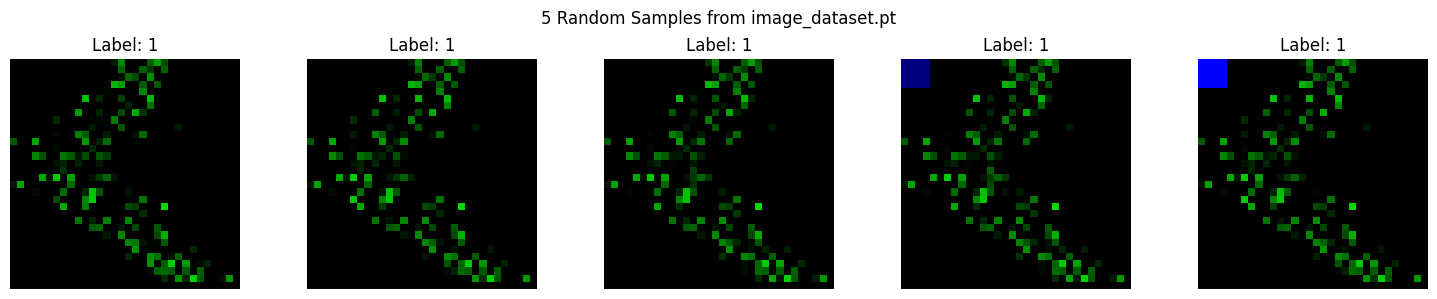

In [1]:
import torch
import matplotlib.pyplot as plt
import random

# Load dataset
dataset_path = '/home/sascha/kubernetes-intrusion-detection-main/KubeFocus/exp1/image_dataset.pt'  # ← change to your path
all_data = torch.load(dataset_path)

# Pick 5 random samples
samples = random.sample(all_data, 5)

# Plot them
plt.figure(figsize=(15, 3))
for i, item in enumerate(samples):
    img = item['image'].numpy()
    label = item['label']
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Label: {label}")
    plt.axis('off')
plt.suptitle("5 Random Samples from image_dataset.pt")
plt.tight_layout()
plt.show()
